# Micro Credit Defaulter Project

Problem Statement:

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on.

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industries is primarily focusing on low income families and are very useful in such areas, the implementation of MFShas been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour.

They arecollaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be6(in Indonesian Rupiah), while, for the loan amount of 10(in Indonesian Rupiah), the payback amount should be 12(in Indonesian Rupiah).

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
#Importing the dataset
df=pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


## Features Information:

- label : Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}
- msisdn : mobile number of user
- aon : age on cellular network in days
- daily_decr30 : Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)
- daily_decr90 : Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)
- rental30 : Average main account balance over last 30 days
- rental90 : Average main account balance over last 90 days
- last_rech_date_ma : Number of days till last recharge of main account
- last_rech_date_da: Number of days till last recharge of data account
- last_rech_amt_ma : Amount of last recharge of main account (in Indonesian Rupiah)
- cnt_ma_rech30 : Number of times main account got recharged in last 30 days
- fr_ma_rech30 : Frequency of main account recharged in last 30 days
- sumamnt_ma_rech30 : Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)
- medianamnt_ma_rech30 : Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)
- medianmarechprebal30 : Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)
- cnt_ma_rech90 : Number of times main account got recharged in last 90 days
- fr_ma_rech90 : Frequency of main account recharged in last 90 days
- sumamnt_ma_rech90 : Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)
- medianamnt_ma_rech90 : Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)
- medianmarechprebal90 : Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)
- cnt_da_rech30 : Number of times data account got recharged in last 30 days
- fr_da_rech30: Frequency of data account recharged in last 30 days
- cnt_da_rech90 : Number of times data account got recharged in last 90 days
- fr_da_rech90 : Frequency of data account recharged in last 90 days
- cnt_loans30 : Number of loans taken by user in last 30 days
- amnt_loans30: Total amount of loans taken by user in last 30 days
- maxamnt_loans30 : maximum amount of loan taken by the user in last 30 days
- medianamnt_loans30 : Median of amounts of loan taken by the user in last 30 days
- cnt_loans90 : Number of loans taken by user in last 90 days
- amnt_loans90 : Total amount of loans taken by user in last 90 days
- maxamnt_loans90 : maximum amount of loan taken by the user in last 90 days
- medianamnt_loans90 : Median of amounts of loan taken by the user in last 90 days
- payback30 : Average payback time in days over last 30 days
- payback90 : Average payback time in days over last 90 days
- pcircle : telecom circle
- pdate : date

## Preprocessing and EDA:

In [11]:
#Checking shape of dataset
df.shape

(209593, 37)

In [12]:
#Checking all column names
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

Above are the list of column names in the dataset.

In [13]:
#Checking the data types of all columns
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

I have all 3 types of data in dataset they are integer, float and object.pdate should be a datetime datatype so we have to change it from object to datetime datatype.

In [14]:
info=pd.DataFrame({})
info=df
info

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [15]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

There is no null values in the dataset and we can also see the datatypes of each column.

In [16]:
#Checking unique values of each column
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

'Unnamed:0' is a index column in raw dataset so we can drop it here itself. And pcircle has only one entry throughout so it will have no contribution with our model training we can drop this column also. Also msisdn is a column with phone numbers of users so this column has no contribution on model building.

In [17]:
#Droping Unnamed: 0, msisdn and pcircle column
df = df.drop(["Unnamed: 0"],axis=1)
df = df.drop(["pcircle"],axis=1)
df = df.drop(["msisdn"],axis=1)

In [18]:
#Checking null values in the dataset
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

There is no null values in our dataset.

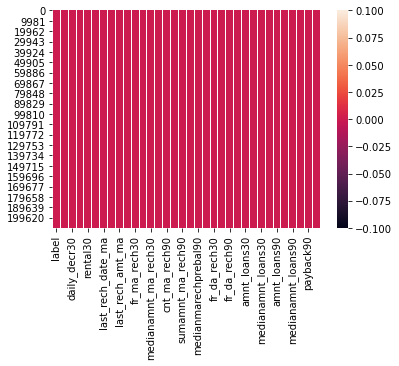

In [19]:
import seaborn as sns
sns.heatmap(df.isnull())

In [20]:
#Checking unique values of target column
df['label'].unique()

array([0, 1], dtype=int64)

As observed here there are only two unique values in target column so its a binary classification problem.

## Feature Extraction:

In [21]:
#Converting object data type to datetime 
df['pdate'] =  pd.to_datetime(df['pdate'])

In [22]:
#Extracting paid year,month and day from pdate

#Extracting year
df["pyear"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.year

#Extracting month
df["pmonth"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.month

#Extracting day
df["pday"]=pd.to_datetime(df.pdate, format="%d/%m/%Y").dt.day

In [23]:
#Droping pdate column after extraction
df = df.drop(["pdate"],axis=1)

Successfully extracted day, month and year column from pdate column

In [24]:
#Checking the value counts of pyear column
df.pyear.value_counts()

2016    209593
Name: pyear, dtype: int64

There is only one value in the pyear colummn and hence we are dropping it.

In [25]:
#Droping pyear column
df = df.drop(["pyear"],axis=1)

In [26]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pmonth', 'pday'],
      dtype='object')

In [27]:
#Checking the value counts of last_rech_date_da column
df.last_rech_date_da.value_counts()

0.000000         202861
7.000000            163
8.000000            160
11.000000           149
13.000000           148
                  ...  
635922.630667         1
684933.969169         1
779774.580500         1
627095.756936         1
508947.450202         1
Name: last_rech_date_da, Length: 1174, dtype: int64

We have around 95% zeroes in this column

In [28]:
#Checking the value counts of cnt_da_rech30 column
df.cnt_da_rech30.value_counts()

0.000000        205479
1.000000          2331
2.000000           372
3.000000           156
4.000000            86
                 ...  
63823.301647         1
32152.874529         1
45934.211400         1
57073.740639         1
38828.342205         1
Name: cnt_da_rech30, Length: 1066, dtype: int64

In this column as well we have around 98% of zeroes

In [29]:
#Checking the value counts of fr_da_rech30 column
df.fr_da_rech30.value_counts()

0.000000         208014
3.000000             64
1.000000             55
2.000000             51
7.000000             47
                  ...  
738055.326743         1
811998.243560         1
792892.884579         1
540679.626283         1
849620.029563         1
Name: fr_da_rech30, Length: 1072, dtype: int64

As obvered this column as well has 98% of zeroes.

In [30]:
#Checking the value counts of cnt_da_rech90 column
df.cnt_da_rech90.value_counts()

0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
12         7
11         7
10         6
13         6
16         4
18         3
15         2
30         1
17         1
19         1
20         1
22         1
25         1
27         1
28         1
38         1
Name: cnt_da_rech90, dtype: int64

This column has approx 96% of zeroes.

In [31]:
#Checking the value counts of fr_da_rech90 column
df.fr_da_rech90.value_counts()

0     208728
3         78
1         66
2         66
4         56
7         55
6         52
5         45
8         44
10        33
9         32
14        32
11        30
12        27
19        22
28        19
13        17
15        17
18        16
29        15
16        14
17        14
22        11
25        11
21        10
20         9
24         8
27         8
32         8
26         7
30         7
31         6
34         5
23         5
37         5
57         3
35         2
41         2
46         1
56         1
55         1
33         1
43         1
42         1
39         1
64         1
Name: fr_da_rech90, dtype: int64

Almos 99% of the values are zeroes.

In [32]:
#Checking the value counts of medianamnt_loans30 column
df.medianamnt_loans30.value_counts()

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

More than 95% zeroes here.

In [33]:
#Checking the value counts of medianamnt_loans90 column
df.medianamnt_loans90.value_counts()

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64

Around 96% of data has zeroes.

As observed above We got more than 90% of zeroes values in some columns.We will be dropping them as skewness will be created beacause of them. While the value counts for other columns are in range.

In [34]:
#Droping columns with more than 90% zeros
df.drop(columns = ['last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','medianamnt_loans30','medianamnt_loans90'],inplace = True)

In [35]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,2,12,6.0,2.0,12,6,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1,6,6.0,1.0,6,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,7,42,6.0,7.0,42,6,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048,3,2.0,...,2,12,6.0,2.0,12,6,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773,4,1.0,...,3,18,6.0,3.0,18,6,1.000000,1.000000,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,1539,5,8.0,...,4,42,12.0,6.0,54,12,4.000000,3.833333,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,773,5,4.0,...,2,18,12.0,3.0,24,12,0.000000,10.500000,7,25


In [36]:
#Observing the data
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,2064.452797,3.978057,3737.355121,...,2.758981,17.952021,274.658747,18.520919,23.645398,6.703134,3.398826,4.321485,6.797321,14.39894
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,2370.786034,4.256090,53643.625172,...,2.554502,17.379741,4245.264648,224.797423,26.469861,2.103864,8.813729,10.308108,0.741435,8.43890
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,770.000000,1.000000,0.000000,...,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.00000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,1539.000000,3.000000,2.000000,...,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.666667,7.000000,14.00000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,2309.000000,5.000000,6.000000,...,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.750000,4.500000,7.000000,21.00000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,55000.000000,203.000000,999606.368132,...,50.000000,306.000000,99864.560864,4997.517944,438.000000,12.000000,171.500000,171.500000,8.000000,31.00000


Statistics are good and data looks clean now.

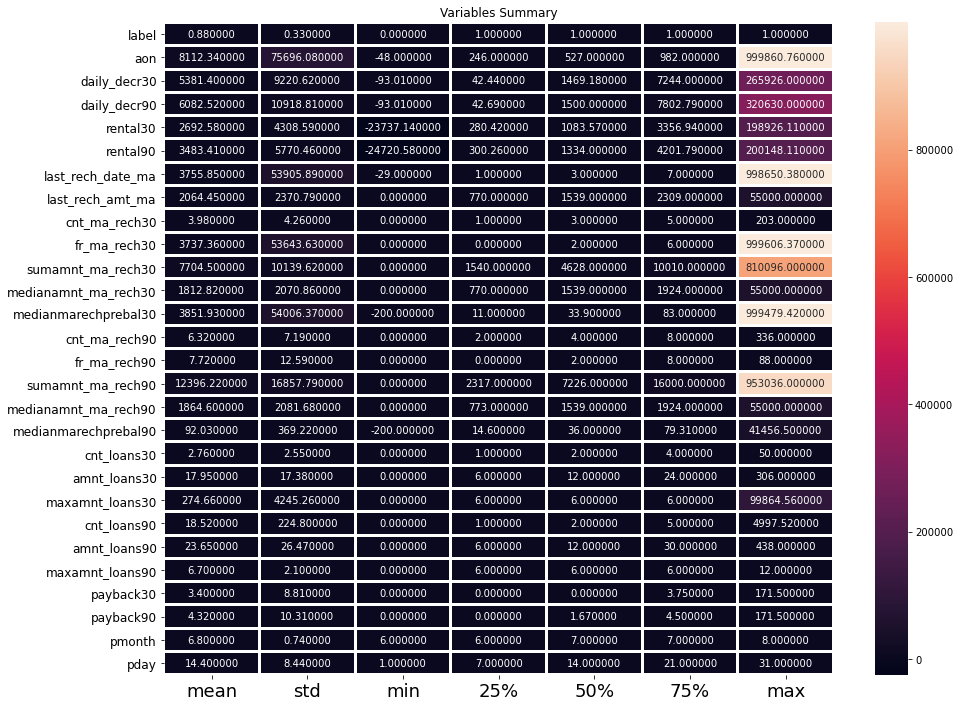

In [37]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables Summary")
plt.show()

## Checking Correlation using Heatmap:

In [38]:
#find correlation co.efficient of all variables in table
cor=df.corr()
cor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.131804,0.237331,0.001330,...,0.196283,0.197272,0.000248,0.004733,0.199788,0.084144,0.048336,0.049183,0.154949,0.006825
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,0.004256,-0.003148,-0.001163,...,-0.001826,-0.001726,-0.002764,-0.000611,-0.002319,-0.001191,0.001940,0.002203,-0.001863,0.000662
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,0.275837,0.451385,-0.000577,...,0.366116,0.471492,-0.000028,0.008962,0.563496,0.400199,0.026915,0.047175,0.518664,0.006477
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,0.264131,0.426707,-0.000343,...,0.340387,0.447869,0.000025,0.009446,0.567204,0.397251,0.019400,0.040800,0.539410,-0.021508
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.127271,0.233343,-0.001219,...,0.180203,0.233453,-0.000864,0.004012,0.298943,0.234211,0.072974,0.095147,0.365699,0.036537
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.121416,0.230260,-0.000503,...,0.171595,0.231906,-0.001411,0.005141,0.327436,0.251029,0.067110,0.099501,0.429407,0.008941
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,-0.000147,0.004311,-0.001629,...,0.001193,0.000903,0.000928,-0.000225,0.000870,-0.001123,-0.002233,-0.001583,-0.001207,0.000560
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,1.000000,-0.002662,0.002876,...,-0.027612,0.008502,0.001000,0.000093,0.014067,0.148460,-0.027369,-0.014260,0.096919,0.028883
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,-0.002662,1.000000,0.001669,...,0.765802,0.752296,0.000109,0.014703,0.685257,0.174104,0.043617,0.017362,0.156148,0.068643
fr_ma_rech30,0.001330,-0.001163,-0.000577,-0.000343,-0.001219,-0.000503,-0.001629,0.002876,0.001669,1.000000,...,0.002666,0.002470,-0.001100,0.003368,0.002634,-0.001890,0.001455,0.000998,-0.001682,0.000927


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

From the above we can cinclude that much of the variables have somewhat relations with each other. We will use Feature selection to select the best features.

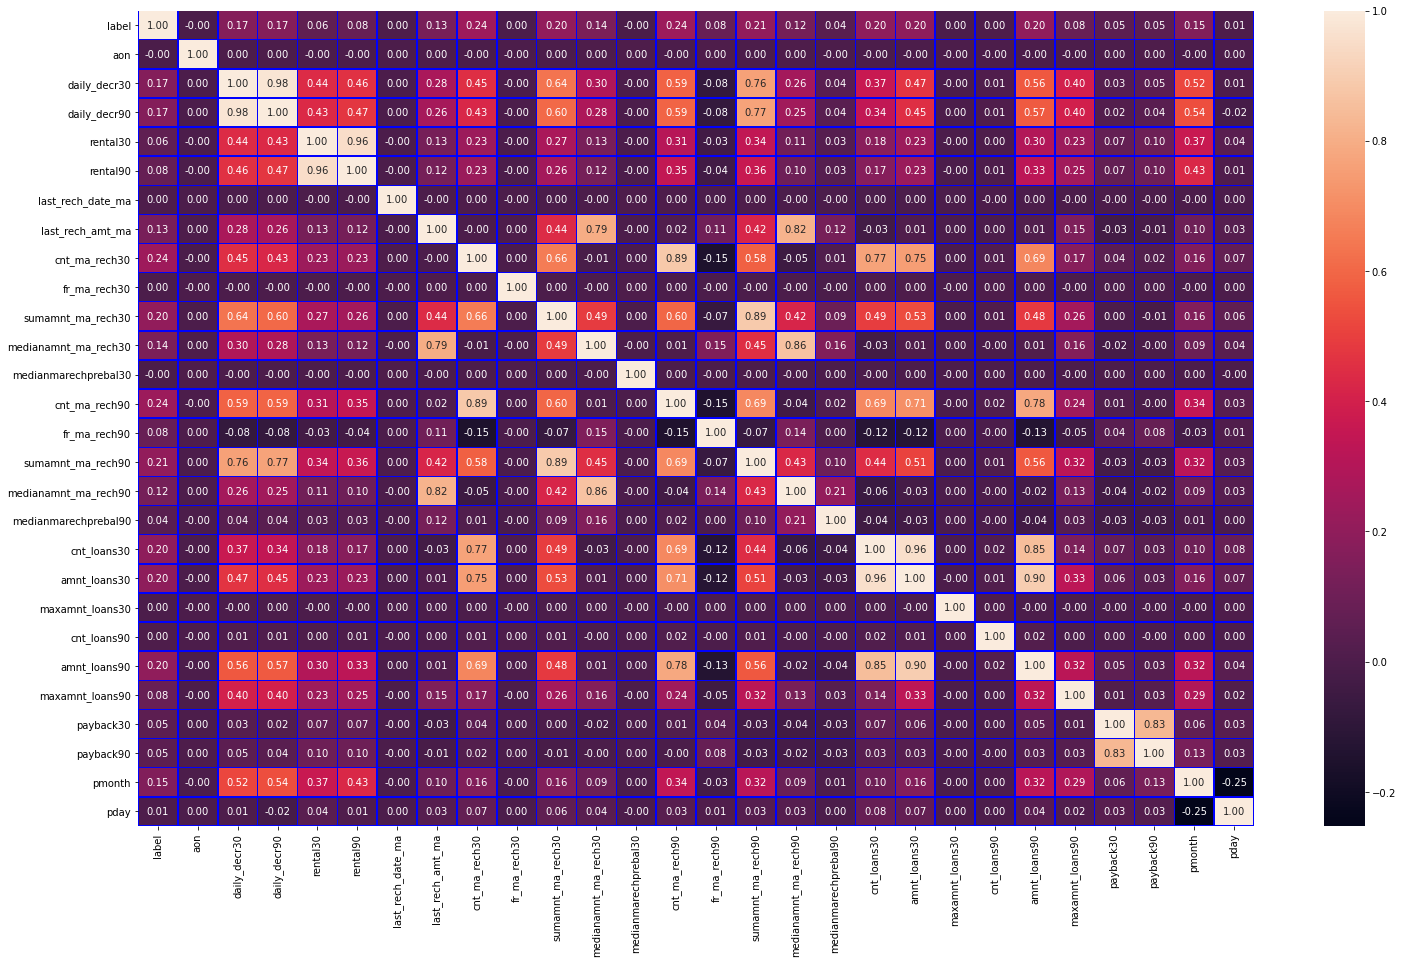

In [39]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="blue",fmt='.2f')

This heatmap shows the correlation matrix of the data. We can observe the relation between one feature to other and relation between features and label. Here we can notice there is no strong relation between features and label. Dark shades are highly positively correlated with the label and light shades are highly negatively correlated with the label.

The features

sumamnt_ma_rech30: Total amount of recharge in main account over last 30 days (in Indonasian Rupiah) sumamnt_ma_rech90:Total amount of recharge in main account over last 90 days (in Indonasian Rupiah-) daily_decr30: Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) daily_decr90: Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) cnt_ma_rech30: Number of times main account got recharged in last 30 days cnt_ma_rech90: Number of times main account got recharged in last 90 days

cnt_loans30 & cnt_loans90: Number of loans taken by user in last 30 days & 90 days respectively. amnt_loans30 & amnt_loans90: Total amount of loans taken by user in last 30 days and 90 days

These features have somewhat strong correlation with the label of defaulters and non-defaulters data. Also, we can observe there are no negative correlation between label and features. Most of the features are correlated with each other.

1-daily_decr30 and daily_decr90 features are highly correlated with each other.

2-rental30 and rental90 features are highly correlated with each other.

3-cnt_loans30 and amount_loans30 columns are highly correlated with each other.

4-amount_loans30 is also highly correlated with amount_loans90 column.

5-medianamnt_loans30 and medianamnt_loans90 is highly correlated with each other.

6-We have to drop one of the features which are highly correlated with other feayures. And if we dont do this then our model will face multicolinearity problem.

In [40]:
cor['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
pmonth                  0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianmarechprebal90    0.039300
pday                    0.006825
cnt_loans90             0.004733
last_rech_date_ma       0.003728
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
aon                    -0.003785
medianmarechprebal30   -0.004829
Name: label, dtype: float64

## Univariate Analysis:

In [41]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

[]


As observed there is no categorical data in the dataset.

In [42]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']


These are the columns which have numerical data.

In [43]:
col=[ 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']

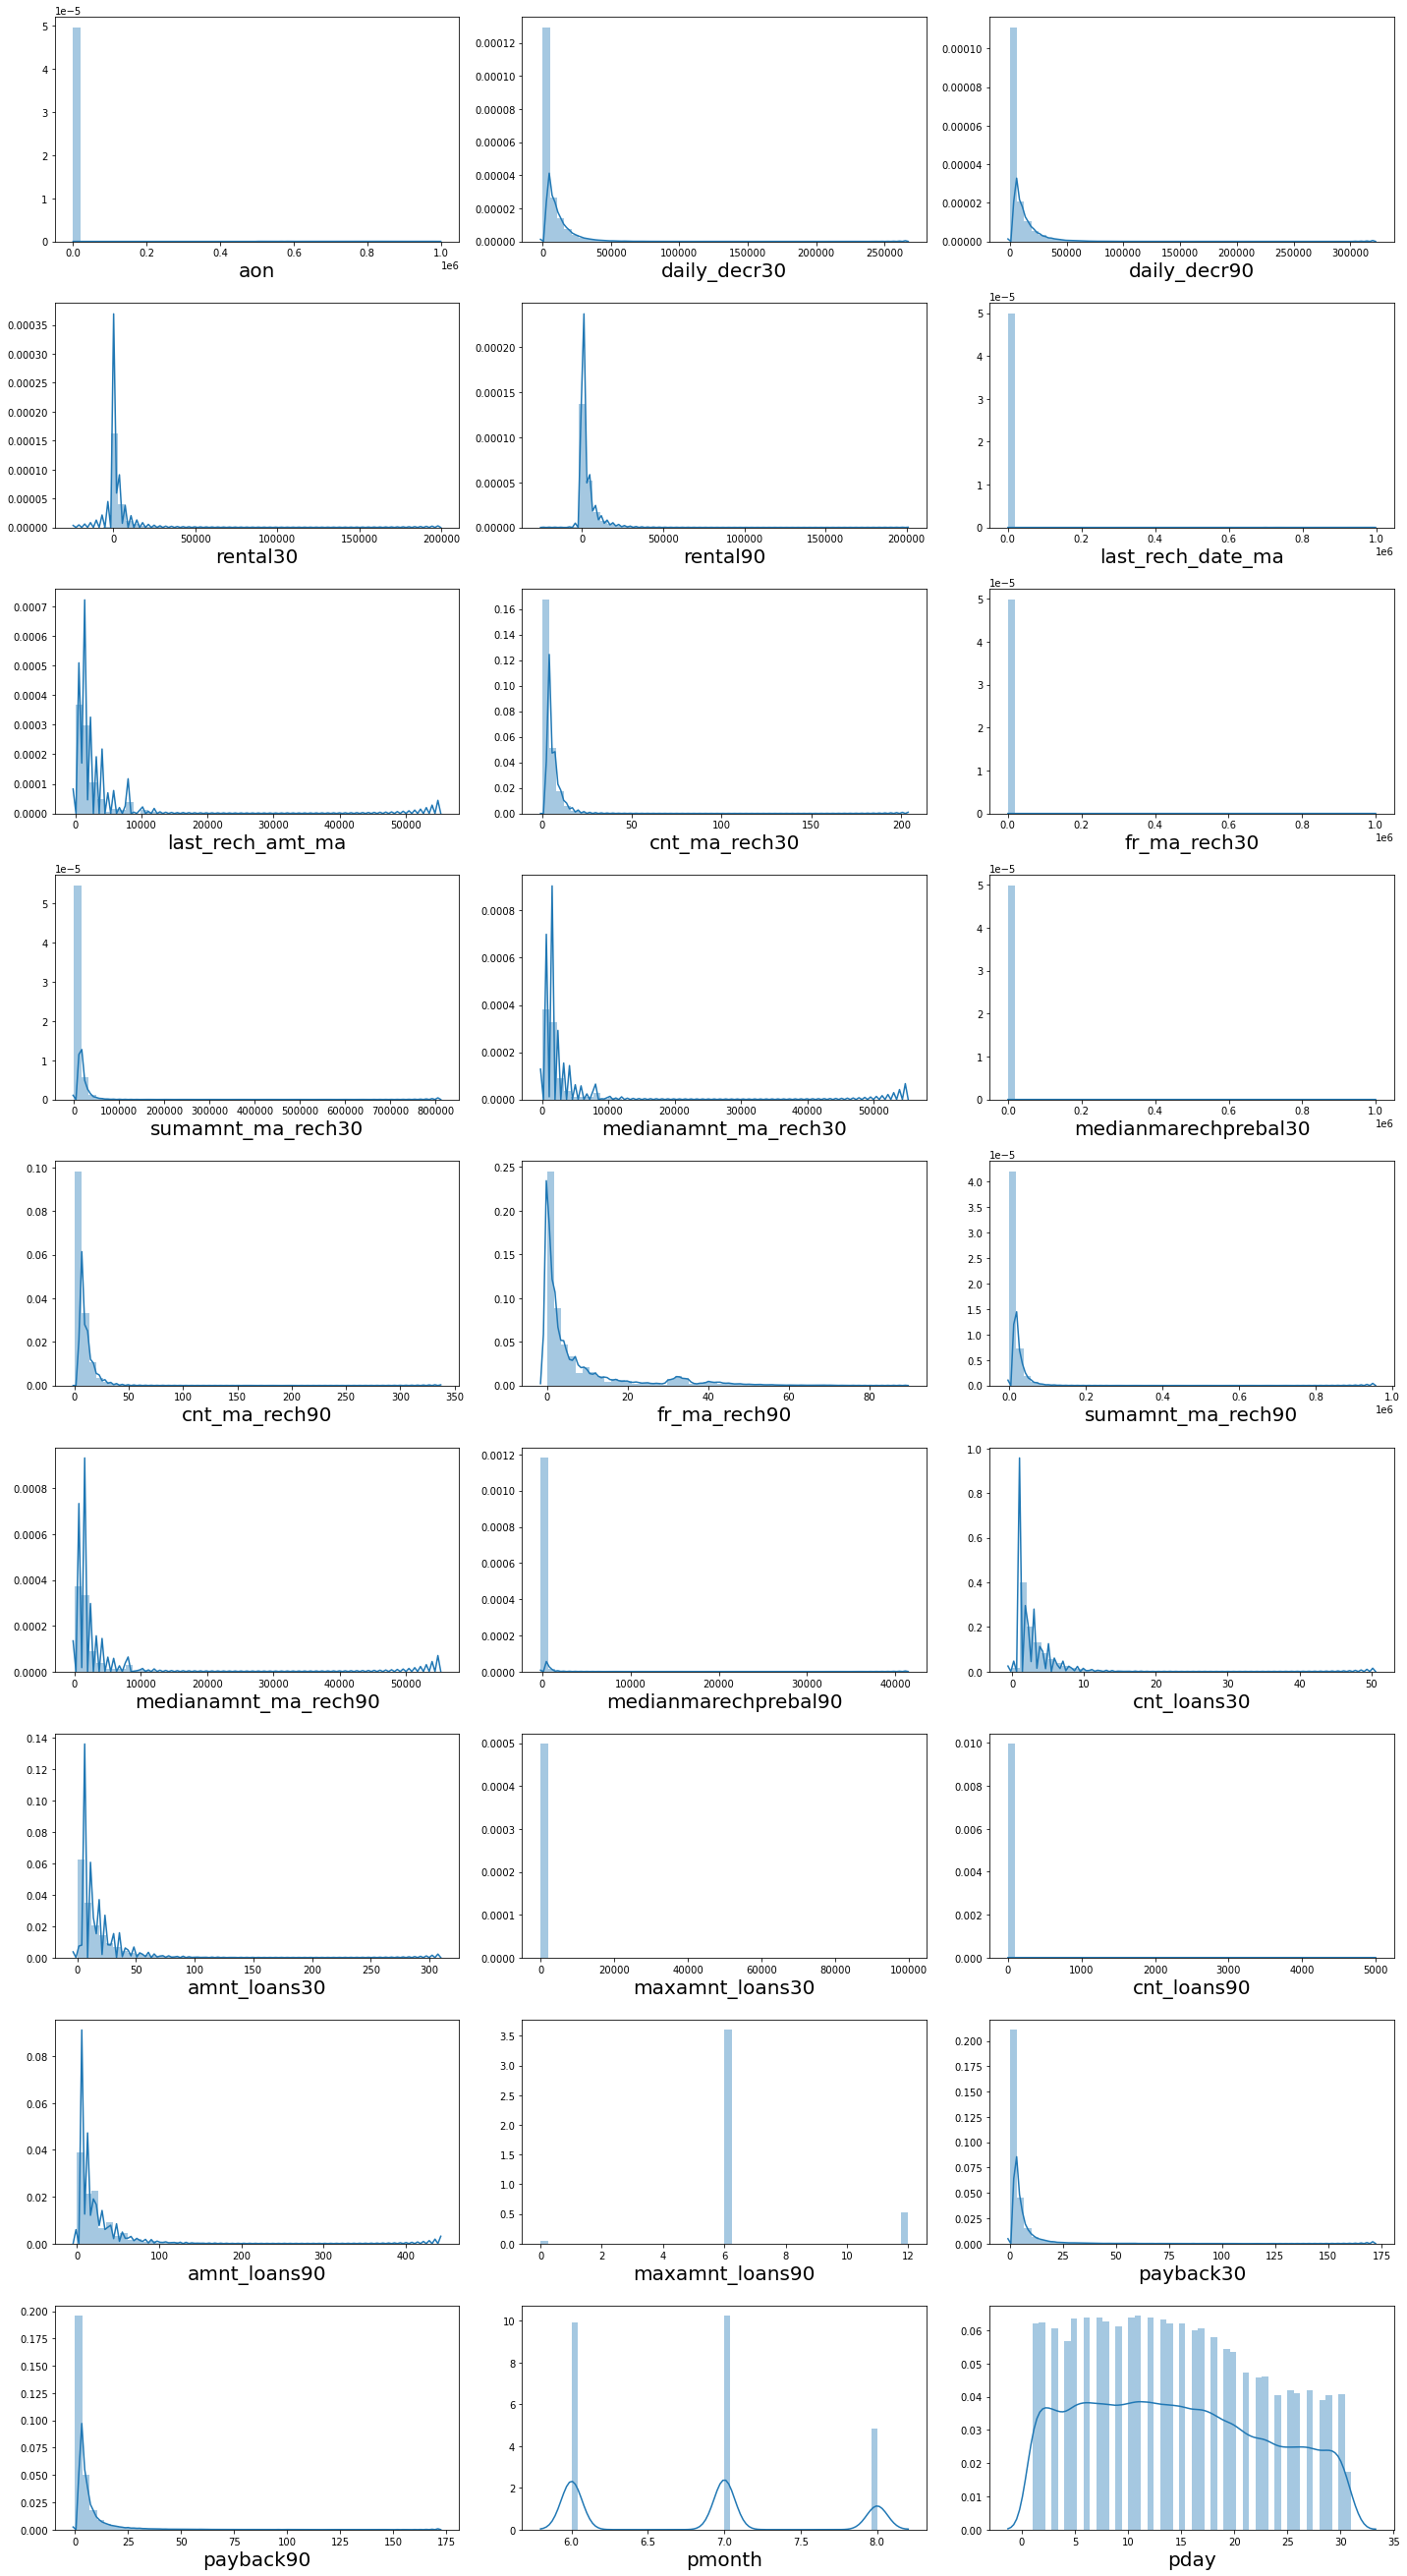

In [44]:
#Distribution plot for all numerical columns except label
plt.figure(figsize = (20,40))
plotnumber = 1
for column in df[col]:
    if plotnumber <=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

As we can see there is skewness in most of the data so we have to treat them.

## Bivariate Analysis:

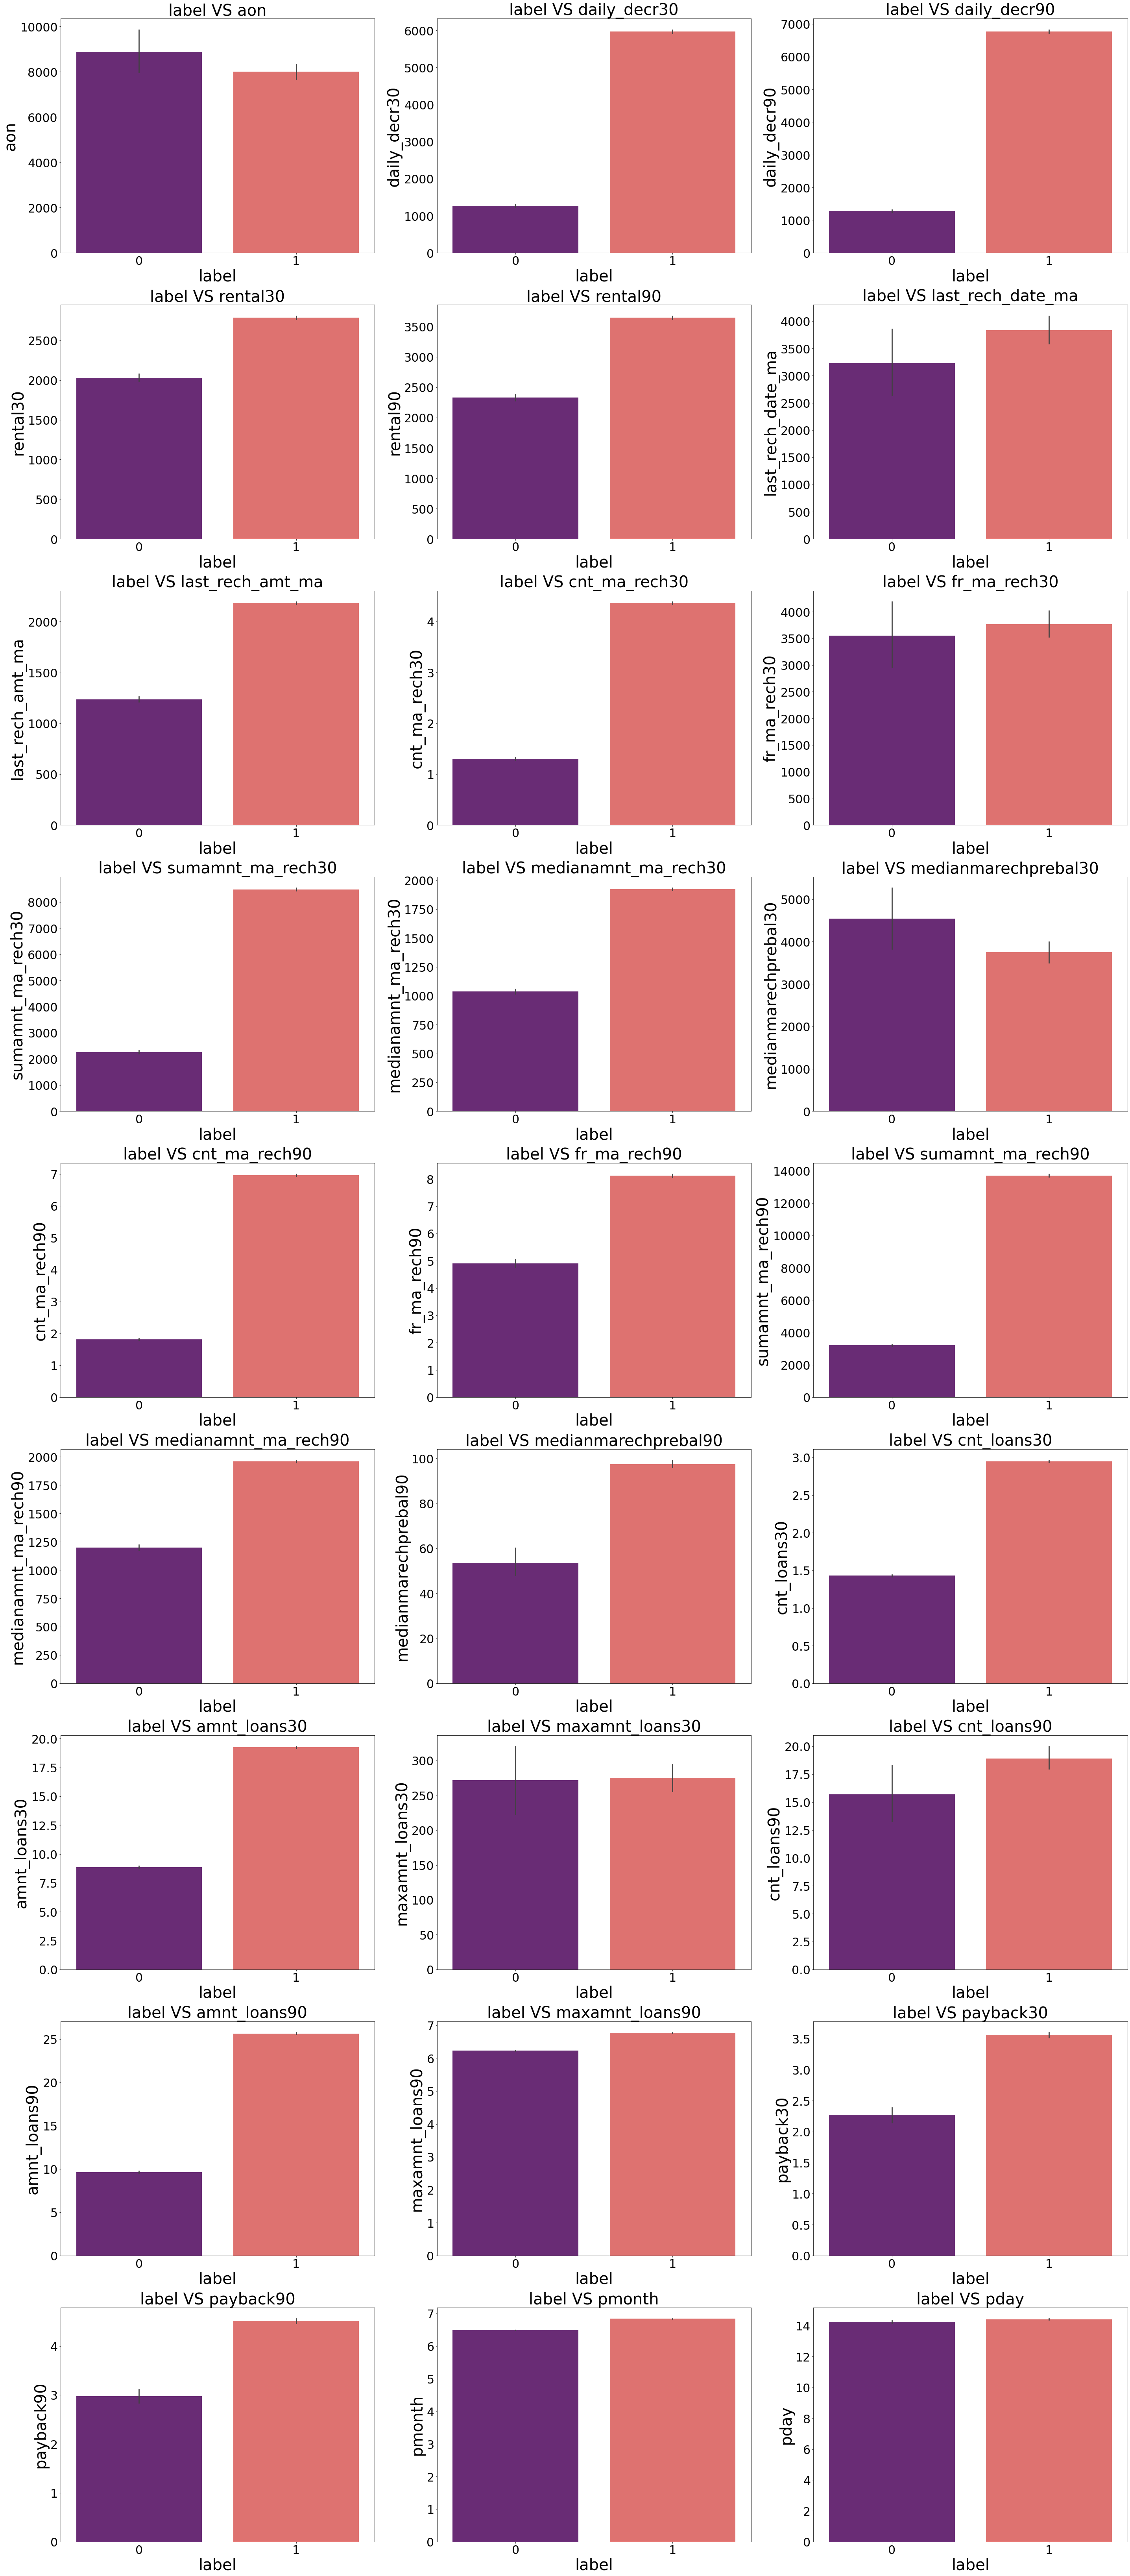

In [45]:
#barplot for numerical columns
plt.figure(figsize=(40,100))
for i in range(len(col)):
    plt.subplot(10,3,i+1)
    sns.barplot(x=df['label'], y=df[col[i]], palette="magma")
    plt.title(f"label VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(col[i],fontsize = 40)
    plt.tight_layout()

**OBSERVATIONS:**
- 1.Customers with high value of Age on cellular network in days(aon) are maximum defaulters(who have not paid there loan amount-0).
- 2.Customers with high value of Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)(daily_decr30) are maximum Non-defaulters(who have paid there loan amount-1).
- 3.Customers with high value of Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)(daily_decr90) are maximum Non-defaulters(who have paid there loan amount-1).
- 4.Customers with high value of Average main account balance over last 30 days(rental30) are maximum Non-defaulters(who have paid there loan amount-1).
- 5.Customers with high value of Average main account balance over last 90 days(rental90) are maximum Non-defaulters(who have paid there loan amount-1).
- 6.Customers with high Number of days till last recharge of main account(last_rech_date_ma) are maximum Non-defaulters(who have paid there loan amount-1).
- 7.Customers with high value of Amount of last recharge of main account (in Indonesian Rupiah)(last_rech_amt_ma) are maximum Non-defaulters(who have paid there loan amount-1).
- 8.Customers with high value of Number of times main account got recharged in last 30 days(cnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
- 9.Customers with high value of Frequency of main account recharged in last 30 days(fr_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1) and also the count is high for defaulters comparitively Non-defaulters are more in number.
- 10.Customers with high value of Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)(sumamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
- 11.Customers with high value of Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)(medianamnt_ma_rech30) are maximum Non-defaulters(who have paid there loan amount-1).
- 12.Customers with high value of Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)(medianmarechprebal30) are maximum defaulters(who have not paid there loan amount-0).
- 13.Customers with high value of Number of times main account got recharged in last 90 days(cnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 14.Customers with high value of Frequency of main account recharged in last 90 days(fr_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 15.Customers with high value of Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)(sumamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 16.Customers with high value of Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)(medianamnt_ma_rech90) are maximum Non-defaulters(who have paid there loan amount-1).
- 17.Customers with high value of Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)(medianmarechprebal90) are maximum Non-defaulters(who have paid there loan amount-1).
- 18.Customers with high value of Number of loans taken by user in last 30 days(cnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
- 19.Customers with high value of Total amount of loans taken by user in last 30 days(amnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
- 20.Customers with high value of maximum amount of loan taken by the user in last 30 days(maxamnt_loans30) are maximum Non-defaulters(who have paid there loan amount-1).
- 21.Customers with high value of Number of loans taken by user in last 90 days(cnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
- 22.Customers with high value of Total amount of loans taken by user in last 90 days(amnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
- 23.Customers with high value of maximum amount of loan taken by the user in last 90 days(maxamnt_loans90) are maximum Non-defaulters(who have paid there loan amount-1).
- 24.Customers with high value of Average payback time in days over last 30 days(payback30) are maximum Non-defaulters(who have paid there loan amount-1).
- 25.Customers with high value of Average payback time in days over last 90 days(payback90) are maximum Non-defaulters(who have paid there loan amount-1).
- 26.In between 6th and 7th month maximum customers both defualters and Non-defaulters have paid there loan amount.
- 27.Below 14th of each month all the customers have paid there loan amount.

## Data Cleaning:

### Checking for Outliers:

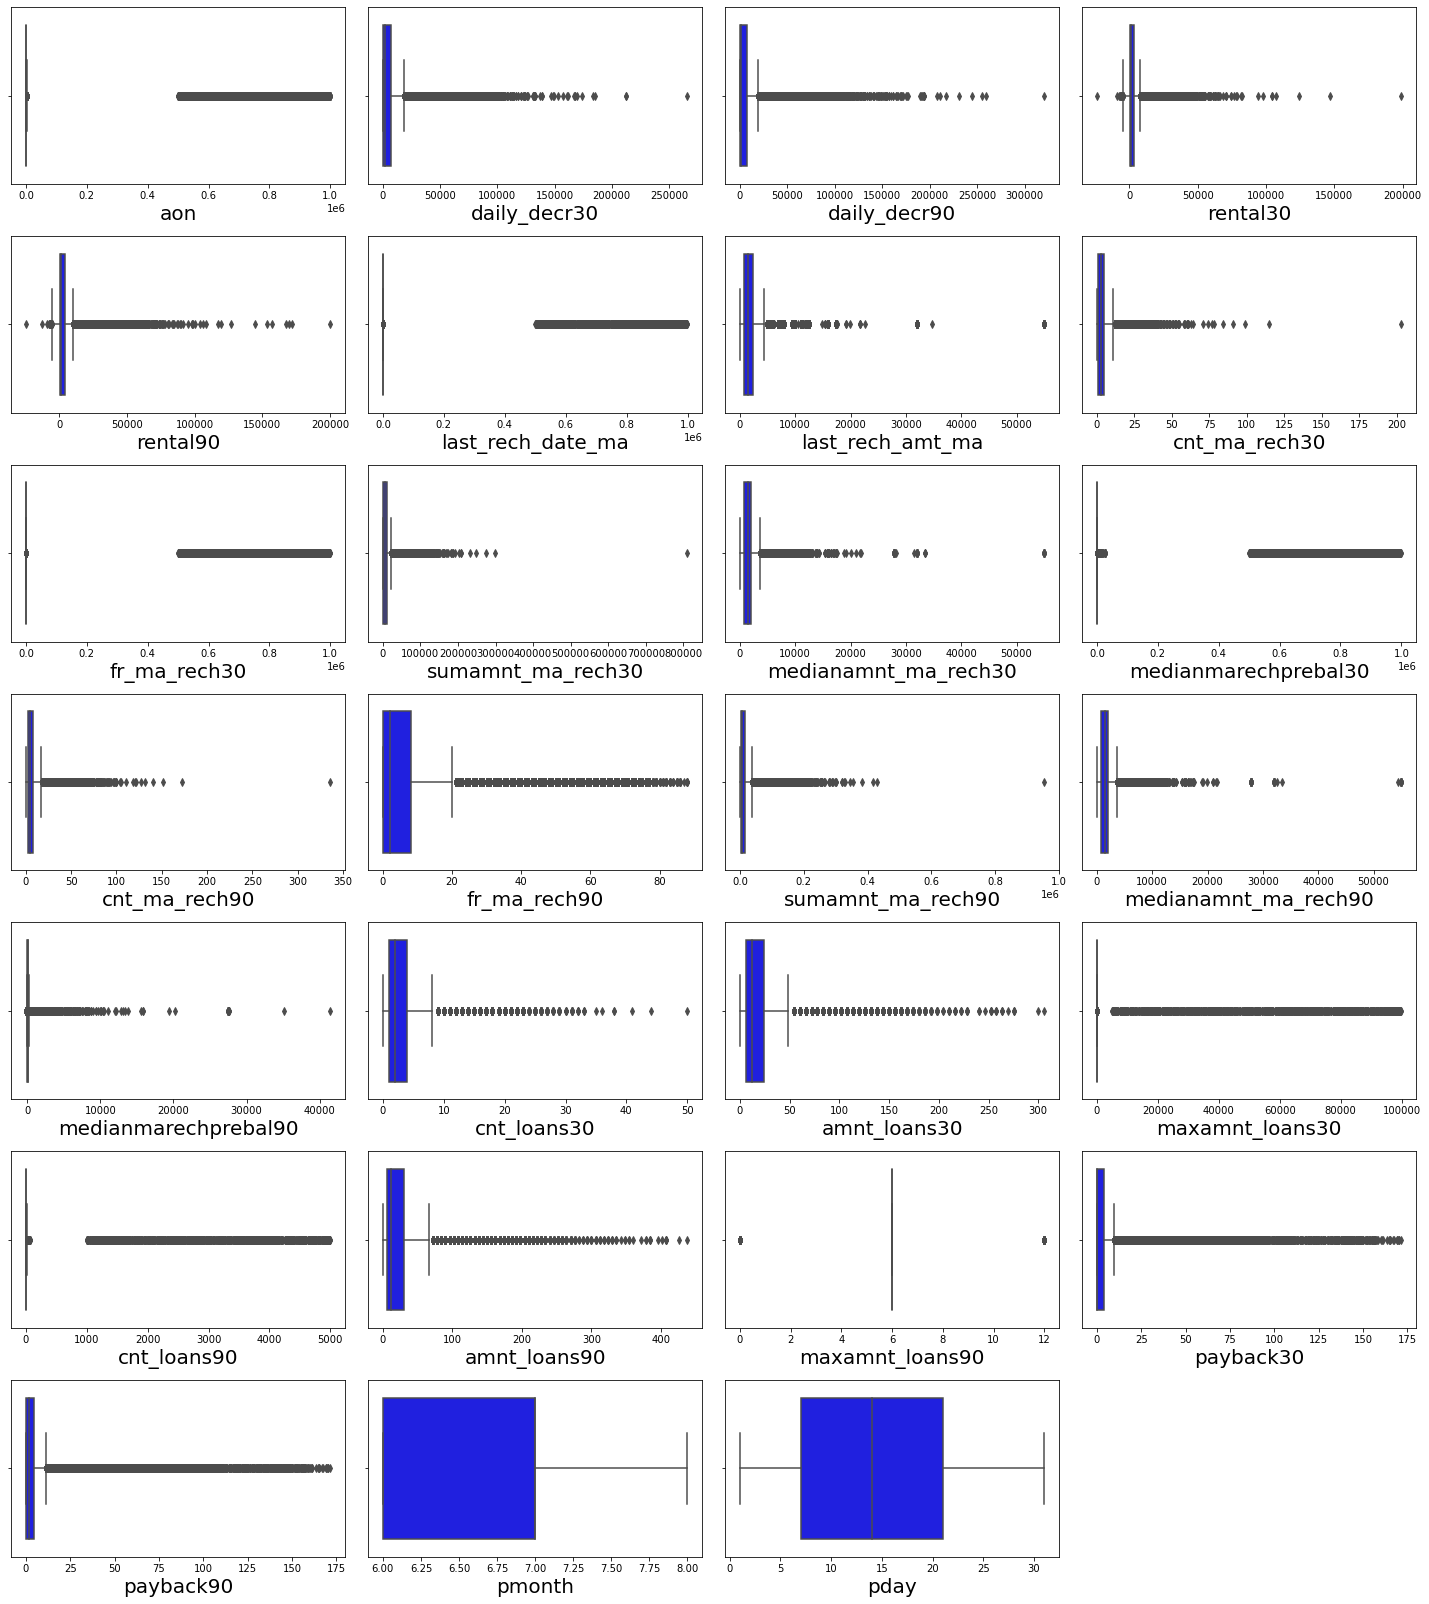

In [46]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in col:
    if plotnumber<=30:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(df[column],color='blue')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Removing Outliers:

## Zscore method:

In [47]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,2,12,6.0,2.0,12,6,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1,6,6.0,1.0,6,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,7,42,6.0,7.0,42,6,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048,3,2.0,...,2,12,6.0,2.0,12,6,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773,4,1.0,...,3,18,6.0,3.0,18,6,1.000000,1.000000,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,1539,5,8.0,...,4,42,12.0,6.0,54,12,4.000000,3.833333,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,773,5,4.0,...,2,18,12.0,3.0,24,12,0.000000,10.500000,7,25


In [48]:
# Feature containing outliers
features= df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']]

In [49]:
# Using zscore to remove outliers
from scipy.stats import zscore

In [50]:
z=np.abs(zscore(features))
# Creating new dataframe by setting z to 3
new_df = df[(z<3).all(axis=1)] 
new_df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,1539,2,21.0,...,2,12,6.0,2.0,12,6,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,5787,1,0.0,...,1,12,12.0,1.0,12,12,0.000000,0.000000,8,10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,1539,1,0.0,...,1,6,6.0,1.0,6,6,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,947,0,0.0,...,2,12,6.0,2.0,12,6,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,2309,7,2.0,...,7,42,6.0,7.0,42,6,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,4048,3,2.0,...,2,12,6.0,2.0,12,6,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,773,4,1.0,...,3,18,6.0,3.0,18,6,1.000000,1.000000,6,12
209590,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,1539,5,8.0,...,4,42,12.0,6.0,54,12,4.000000,3.833333,7,29
209591,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,773,5,4.0,...,2,18,12.0,3.0,24,12,0.000000,10.500000,7,25


In [51]:
# Checking the shape of dataset before and after removing outliers
print("Shape of dataset before removing outliers:", df.shape)
print("Shape of dataset after removing outliers:", new_df.shape)

Shape of dataset before removing outliers: (209593, 28)
Shape of dataset after removing outliers: (171224, 28)


In [52]:
# Checking the the data loss after removing outliers
data_loss = (207550-170071)/207550*100
data_loss

18.05781739339918

After using Zscore method we loss around 18% of the data which is not acceptable. The acceptable range is 7-8%. So we will try for different method as well.

### IQR (Inter Quartile Range) Method:

In [53]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape of data after using IQR method:", df1.shape)

Shape of data after using IQR method: (77450, 28)


In [54]:
# Checking the the data loss after removing outliers
data_loss = (207550-78654)/207550*100
data_loss

62.103589496506864

The data loss here is more than that of Zscore method as well. Therefore we will use Percentile method..

### Percentile Method:

In [55]:
# Checking the shape of data we have before treating of outliers.
print('before removing outliers shape was:', df.shape)

before removing outliers shape was: (209593, 28)


In [56]:
#Removing outliers using percentile method in train dataset
for col in features:
    if df[col].dtypes != 'object':
        percentile = df[col].quantile([0.01,0.98]).values
        df[col][df[col]<=percentile[0]]=percentile[0]
        df[col][df[col]>=percentile[1]]=percentile[1]
        

Here successfully removed the outliers present in the dataset.

In [57]:
# Checking the shape of data we have after treating of outliers.
print('after removing outliers shape is: ', df.shape)

after removing outliers shape is:  (209593, 28)


No data loss

### Skewness Removal:

In [58]:
# Checking for skewness in dataset
df.skew()

label                  -2.270254
aon                     0.935197
daily_decr30            1.974394
daily_decr90            2.091659
rental30                2.106223
rental90                2.194864
last_rech_date_ma       2.615836
last_rech_amt_ma        2.080016
cnt_ma_rech30           1.415594
fr_ma_rech30            1.703205
sumamnt_ma_rech30       1.750999
medianamnt_ma_rech30    2.115971
medianmarechprebal30    2.830858
cnt_ma_rech90           1.569282
fr_ma_rech90            1.985638
sumamnt_ma_rech90       1.863547
medianamnt_ma_rech90    2.133303
medianmarechprebal90    2.666638
cnt_loans30             1.576547
amnt_loans30            1.733837
maxamnt_loans30         1.405285
cnt_loans90             1.923139
amnt_loans90            1.840032
maxamnt_loans90         2.241299
payback30               2.648819
payback90               2.829305
pmonth                  0.343242
pday                    0.199845
dtype: float64

Here we can observe the skewness present in all the columns except Day and Month. Since label is our target variable no need to remove skewness in this column as well. Lets remove the columns having skewness more than +0.5 & -0.5 using power transformation method(yeo-johnson method).

### Removing skewness using yeo-johnson method:

In [59]:
# Removing skewness using yeo-johnson  method to get better prediction
features= ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']

In [60]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [61]:
df[features] = scaler.fit_transform(df[features].values)
df[features]

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,medianamnt_ma_rech90,medianmarechprebal90,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
0,-0.696438,0.493155,0.470041,-0.653011,-0.638396,-0.318148,0.081985,-0.292754,1.713444,-0.192082,...,0.147199,-0.830131,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-1.948303e-13,1.785799,1.821484
1,0.388296,1.119549,1.071131,0.499346,0.280078,1.551138,1.531119,-0.813308,-1.125020,0.221233,...,1.751936,0.380302,-0.917748,-0.105640,2.275299,-1.129610,-0.195308,1.340081e-12,-0.938528,-1.019522
2,0.042606,0.176750,0.161924,-0.349829,-0.409481,0.009030,0.081985,-0.813308,-1.125020,-0.559381,...,0.147199,0.438673,-0.917748,-0.905221,-0.269609,-1.129610,-1.184033,-1.948303e-13,-0.938528,-1.019522
3,-0.817739,-1.123765,-1.121318,-0.688460,-0.685134,2.051429,-0.297745,-1.676293,-1.125020,-1.899447,...,-0.264481,-1.258848,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-1.948303e-13,-0.938528,-1.019522
4,0.754834,-0.591620,-0.591349,-0.275861,-0.349346,0.249421,0.454627,1.016428,0.160683,1.323060,...,0.808981,0.010082,1.608532,1.499492,-0.269609,1.235280,1.166897,-1.948303e-13,0.640306,0.428035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,-0.277218,-0.589096,-0.588854,-0.279385,-0.352211,-0.814508,1.069436,0.083815,0.160683,0.687672,...,0.924348,0.675615,0.005250,-0.105640,-0.269609,-0.182317,-0.195308,-1.948303e-13,0.092407,-0.104773
209589,0.925010,-0.986372,-0.983738,-0.062133,-0.175683,0.249421,-0.437741,0.380110,-0.270330,-0.189399,...,-0.415078,0.825560,0.557541,0.394877,-0.269609,0.340924,0.305428,-1.948303e-13,0.092407,-0.104773
209590,0.844700,1.108188,1.062561,1.029157,1.242338,0.009030,0.081985,0.624962,1.118037,0.594652,...,0.147199,0.203629,0.935485,1.499492,2.275299,1.095711,1.378295,1.340081e-12,0.979695,0.754284
209591,1.607797,1.134119,1.088187,-0.555095,-0.383530,-0.318148,-0.437741,0.624962,0.641001,0.826676,...,0.602319,0.740052,0.005250,0.394877,2.275299,0.340924,0.625139,1.340081e-12,-0.938528,1.354948


In [62]:
# Checking skewness after using yeo-johnson method
df[features].skew()

aon                    -0.059160
daily_decr30           -0.143090
daily_decr90           -0.132714
rental30                0.720837
rental90                0.757030
last_rech_date_ma       0.043786
last_rech_amt_ma       -0.096659
cnt_ma_rech30          -0.010127
fr_ma_rech30            0.133182
sumamnt_ma_rech30      -0.369884
medianamnt_ma_rech30   -0.239052
medianmarechprebal30   -0.046675
cnt_ma_rech90          -0.012068
fr_ma_rech90            0.140655
sumamnt_ma_rech90      -0.265438
medianamnt_ma_rech90   -0.100228
medianmarechprebal90   -0.032049
cnt_loans30             0.042626
amnt_loans30            0.006048
maxamnt_loans30         0.399869
cnt_loans90             0.206928
amnt_loans90            0.133935
maxamnt_loans90         0.000000
payback30               0.287988
payback90               0.201580
dtype: float64

As observed skewness is almost reduced in all columns.

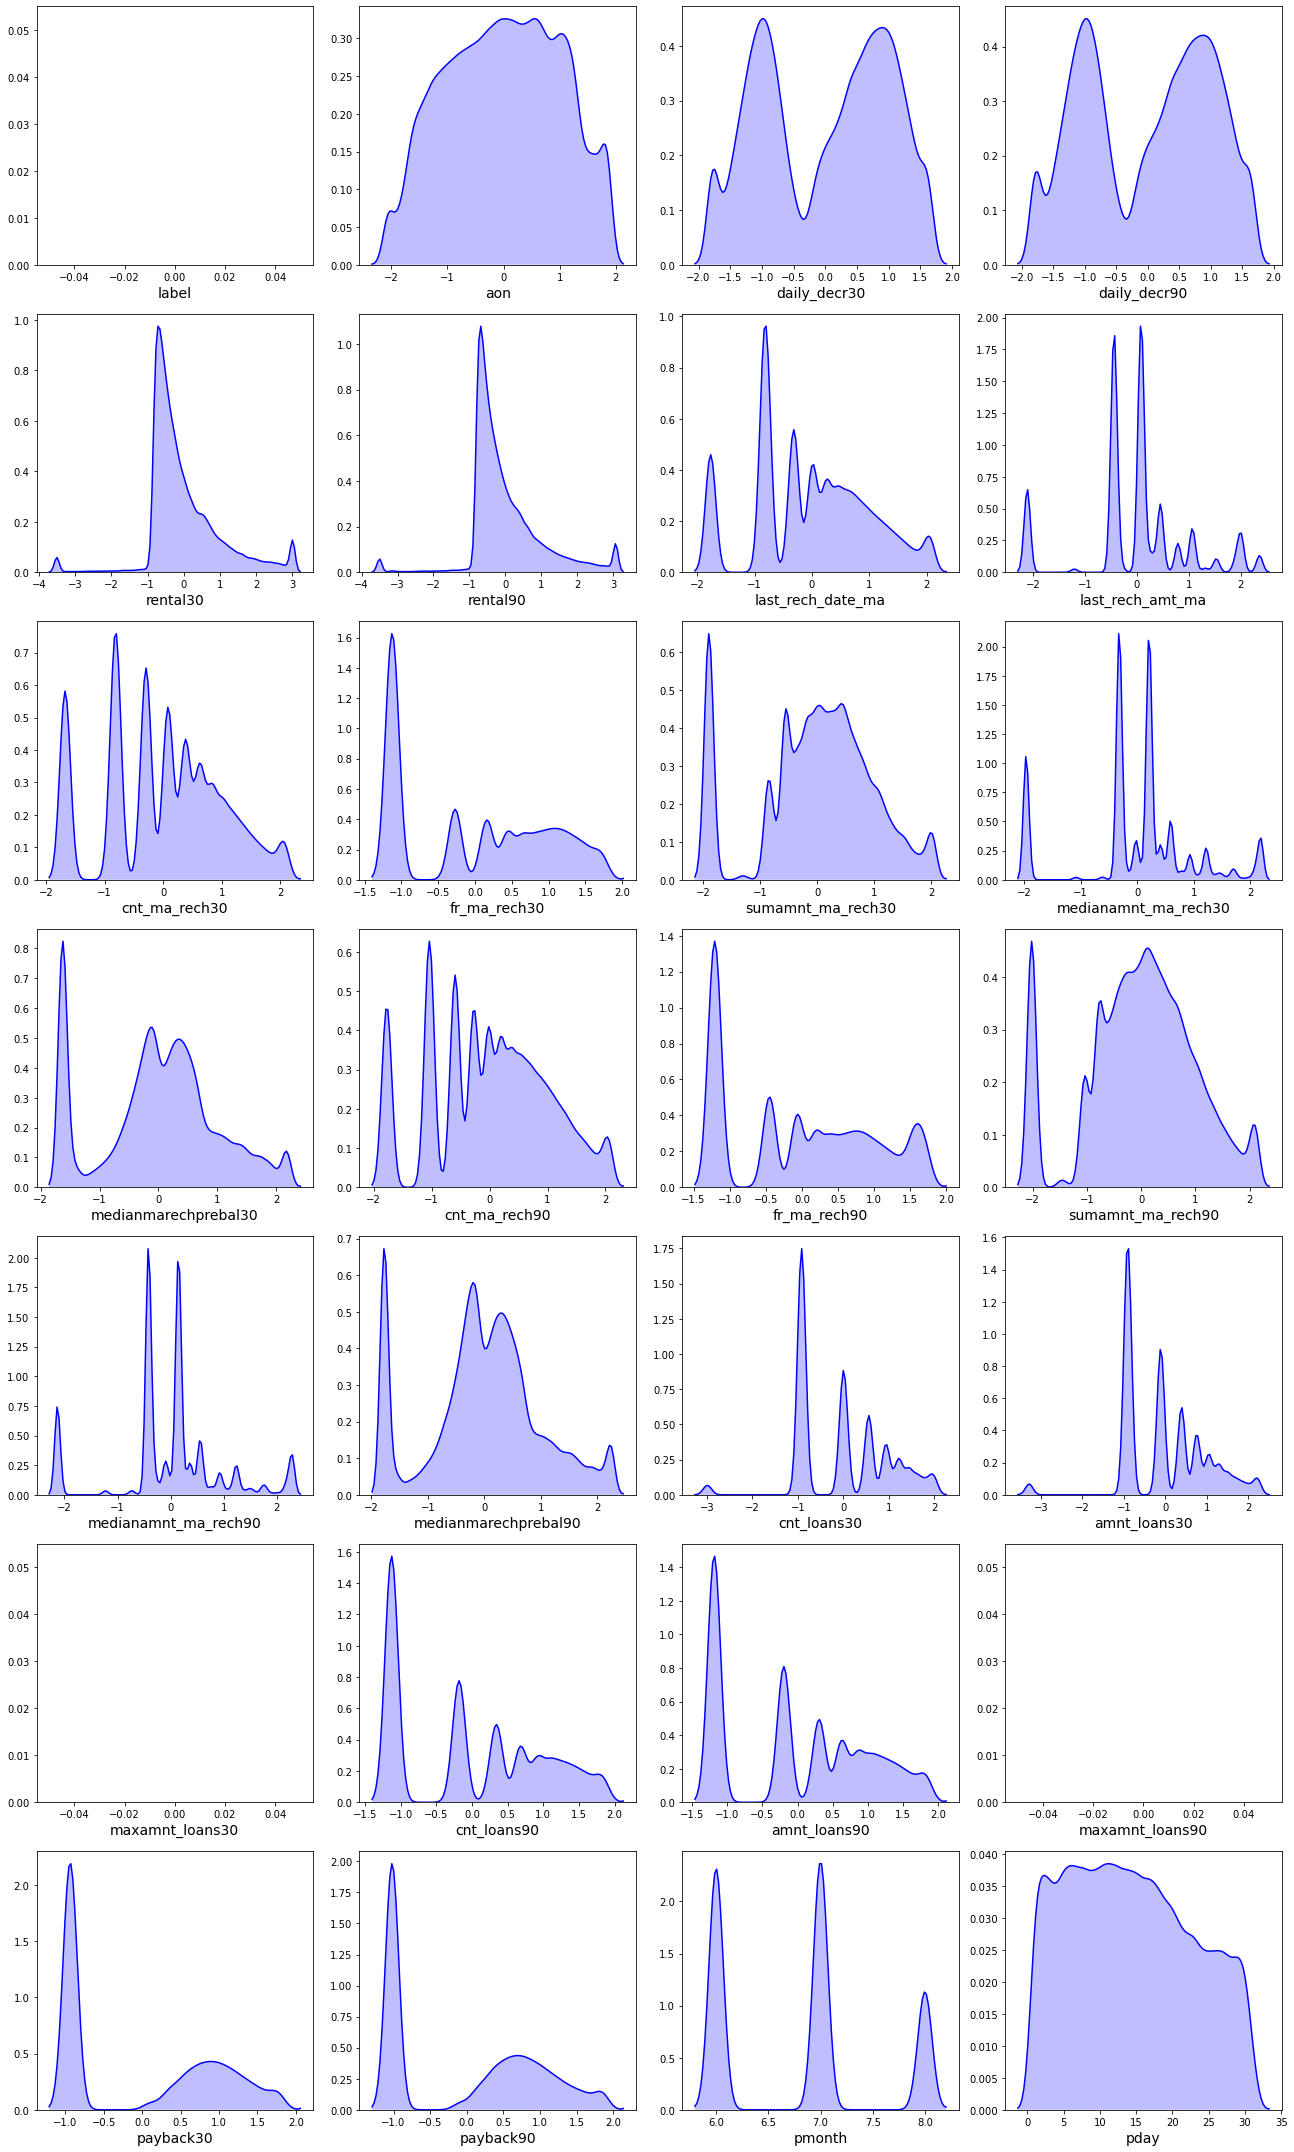

In [63]:
# Checking how the data has been distriubted in each column after removing skewness
plt.figure(figsize=(18,30),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.distplot(df[column],color="blue",kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

## Sepearting the data into feature and target columns:

In [64]:
# Separating the feature and label into x and y
x = df.drop("label", axis=1)
y = df["label"]

In [65]:
# Dimension of x and y
x.shape,y.shape

((209593, 27), (209593,))

# Scaling:

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [67]:
X.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0.349425,0.665864,0.656818,0.438157,0.435442,0.378105,0.490125,0.369059,0.990908,0.435822,...,0.602057,0.576109,0.604179,0.318179,0.327419,0.0,1.000000,0.985619,0.5,0.633333
1,0.625641,0.849073,0.831458,0.614528,0.574889,0.865464,0.813901,0.230201,0.000000,0.541325,...,0.416446,0.576109,1.000000,0.000000,0.327419,1.0,0.000000,0.000000,1.0,0.300000
2,0.537614,0.573322,0.567298,0.484559,0.470197,0.463407,0.490125,0.230201,0.000000,0.342065,...,0.416446,0.431350,0.604179,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.600000
3,0.318537,0.192945,0.194465,0.432731,0.428347,0.995900,0.405283,0.000000,0.000000,0.000000,...,0.602057,0.576109,0.604179,0.318179,0.327419,0.0,0.000000,0.000000,0.0,0.166667
4,0.718976,0.348588,0.348442,0.495880,0.479327,0.526081,0.573384,0.718284,0.448839,0.822577,...,0.924471,0.866709,0.604179,0.794324,0.778517,0.0,0.579532,0.502196,0.0,0.700000


## Finding Best Random State and Accuracy:

In [68]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [69]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = DecisionTreeClassifier()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8874646140144407  on Random_state  40


# Classification Problem:

In [70]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import cross_val_score

## Logistic Regression:

In [71]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
preddt=LR.predict(X_test)
Accuracy_Score = accuracy_score(y_test, preddt)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

#cross validation score
scores = cross_val_score(LR, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 88.595375170966
Confusion Matrix: [[ 1601  6329]
 [  842 54106]]
              precision    recall  f1-score   support

           0       0.66      0.20      0.31      7930
           1       0.90      0.98      0.94     54948

    accuracy                           0.89     62878
   macro avg       0.78      0.59      0.62     62878
weighted avg       0.87      0.89      0.86     62878


Cross validation score : 88.60362723740087
Accuracy_Score - Cross Validation Score : -0.008252066434877747


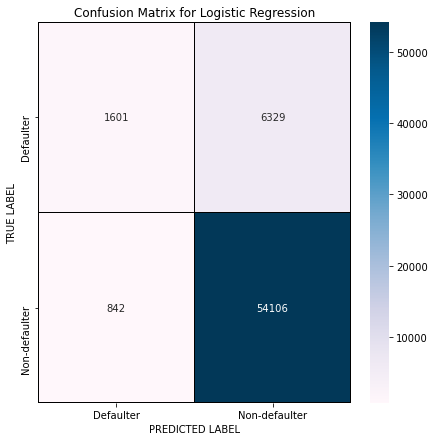

In [72]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## Decision Tree Classifier:

In [73]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,y_train)
preddt=DTC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, preddt)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

#cross validation score
scores = cross_val_score(DTC, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 88.22799707369828
Confusion Matrix: [[ 4438  3492]
 [ 3910 51038]]
              precision    recall  f1-score   support

           0       0.53      0.56      0.55      7930
           1       0.94      0.93      0.93     54948

    accuracy                           0.88     62878
   macro avg       0.73      0.74      0.74     62878
weighted avg       0.88      0.88      0.88     62878


Cross validation score : 88.30733914196104
Accuracy_Score - Cross Validation Score : -0.07934206826276125


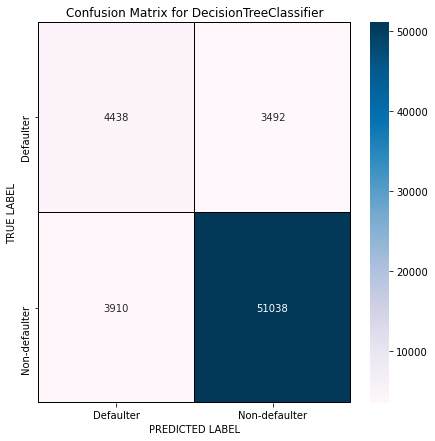

In [74]:
cm = confusion_matrix(y_test, preddt)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

## Bagging Classifier:

In [75]:
BC=BaggingClassifier()
BC.fit(X_train,y_train)
predbc=BC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predbc)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predbc))
print(classification_report(y_test,predbc))

#cross validation score
scores = cross_val_score(BC, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 91.30697541270396
Confusion Matrix: [[ 4678  3252]
 [ 2214 52734]]
              precision    recall  f1-score   support

           0       0.68      0.59      0.63      7930
           1       0.94      0.96      0.95     54948

    accuracy                           0.91     62878
   macro avg       0.81      0.77      0.79     62878
weighted avg       0.91      0.91      0.91     62878


Cross validation score : 91.36851022184459
Accuracy_Score - Cross Validation Score : -0.0615348091406247


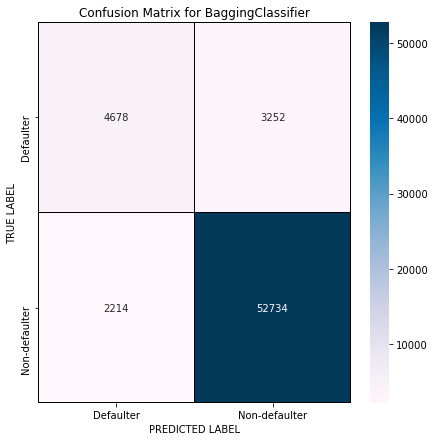

In [76]:
cm = confusion_matrix(y_test, predbc)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for BaggingClassifier')
plt.show()

## AdaBoost Classifier:

In [77]:
ABC=AdaBoostClassifier()
ABC.fit(X_train,y_train)
predab=ABC.predict(X_test)
Accuracy_Score = accuracy_score(y_test, predab)*100
print('Accuracy Score:',Accuracy_Score)
print('Confusion Matrix:',confusion_matrix(y_test, predab))
print(classification_report(y_test,predab))

#cross validation score
scores = cross_val_score(ABC, X, y, cv = 5).mean()*100
print("\nCross validation score :", scores)

#difference of accuracy and cv score
diff = Accuracy_Score - scores
print("Accuracy_Score - Cross Validation Score :", diff)

Accuracy Score: 91.00003180762747
Confusion Matrix: [[ 3182  4748]
 [  911 54037]]
              precision    recall  f1-score   support

           0       0.78      0.40      0.53      7930
           1       0.92      0.98      0.95     54948

    accuracy                           0.91     62878
   macro avg       0.85      0.69      0.74     62878
weighted avg       0.90      0.91      0.90     62878


Cross validation score : 90.99015691474838
Accuracy_Score - Cross Validation Score : 0.009874892879082608


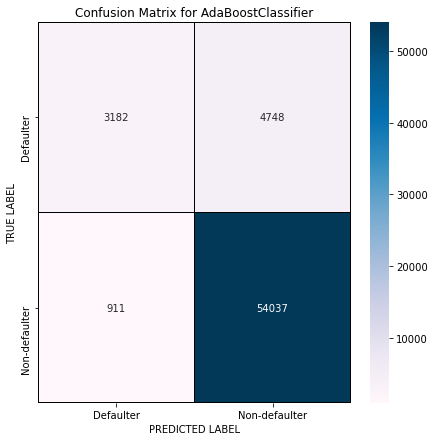

In [78]:
cm = confusion_matrix(y_test, predab)

x_axis_labels = ["Defaulter","Non-defaulter"]
y_axis_labels = ["Defaulter","Non-defaulter"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="PuBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoostClassifier')
plt.show()

As observed we can see that we get the highest accuracy in Bagging Classifier and the difference between accuracy score annd cross validation score is also very less. So hence we are choosing Bagging Classifier.

## AUC-ROC Curve:

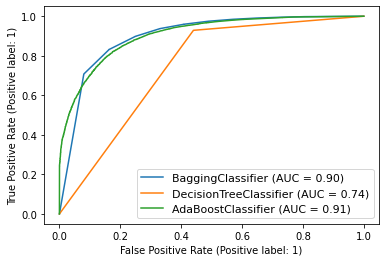

In [79]:
# Plotting ROC for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 
disp = plot_roc_curve(BC,X_test,y_test)
plot_roc_curve(DTC, X_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, X_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In this AUC ROC curve we can see that the AUC value is highest for Bagging Classifier and AdaBoost Classifier. We will be choosing Bagging Classifier because we got the least difference between accuracy score and cross validation score there.

## Hyper Parameter Tuning:

In [80]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [81]:
parameter = {'bootstrap':['True','False'],
             'n_jobs': [-2,-1,1,2],
             'n_estimators':[10,20,30,40],
             'warm_start':['True','False']}

In [82]:
GCV=GridSearchCV(BaggingClassifier(),parameter,cv=5)

In [83]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'bootstrap': ['True', 'False'],
                         'n_estimators': [10, 20, 30, 40],
                         'n_jobs': [-2, -1, 1, 2],
                         'warm_start': ['True', 'False']})

In [84]:
GCV.best_params_

{'bootstrap': 'False', 'n_estimators': 40, 'n_jobs': 2, 'warm_start': 'True'}

In [85]:
Final_mod=BaggingClassifier(bootstrap='True', n_jobs=-1,warm_start='True', n_estimators=40)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test, pred)

print('Accuracy Score:',(accuracy_score(y_test,pred)*100))
print('Confusion matrix:',confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score: 92.0083335983969
Confusion matrix: [[ 4402  3528]
 [ 1497 53451]]
              precision    recall  f1-score   support

           0       0.75      0.56      0.64      7930
           1       0.94      0.97      0.96     54948

    accuracy                           0.92     62878
   macro avg       0.84      0.76      0.80     62878
weighted avg       0.91      0.92      0.91     62878



The accuracy of the model has been increased from 91.36% to 92%.

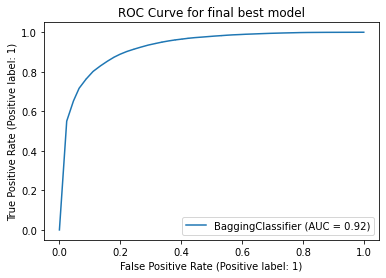

In [86]:
#Ploting ROC curve for final best model
plot_roc_curve(Final_mod, X_test, y_test)
plt.title('ROC Curve for final best model')
plt.show()

Once hyperparameter tuning is done we got improvement in the AUC ROC Curve as well.

## Saving the model:

In [87]:
#Saving the model as .pkl file
import joblib
joblib.dump(Final_mod,"Micro Credit Defaulter.pkl")

['Micro Credit Defaulter.pkl']

## Output:

In [95]:
import numpy as np
a=np.array(y_test)
predicted=np.array(predbc,y_test)
df_con=pd.DataFrame({"Original":a,"Predicted":predicted},index=range(len(a)))
df_con

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
62873,1,1
62874,1,1
62875,1,1
62876,1,1


Text(0.5, 1.0, 'Predicted')

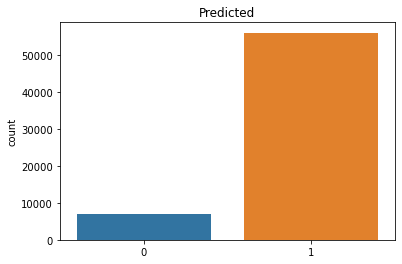

In [96]:
sns.countplot(x=predicted, data=df_con)
plt.title("Predicted")

Text(0.5, 1.0, 'Original')

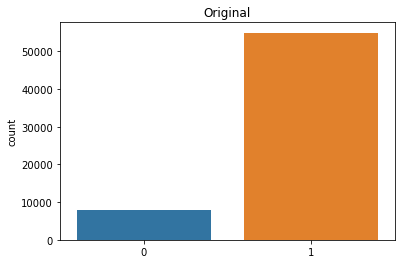

In [97]:
ax = sns.countplot(x=a, data=df)
plt.title("Original")